In [59]:
import json

tweets_data = []
tweets_file = open('geotagged_tweets_20160812-0912.jsons', "r")
print(tweets_file)

counter = 0
for line in tweets_file:
    counter = counter + 1
    if counter > 50000:
        break
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
# This creates a python list of strings with json data in the string.  there's a lot of fields, and I can either
# cherry pick the fields I want, or figure out how to read them all in and subset them once I have them in a nice dataframe

print(tweets_data[1:10])

<_io.TextIOWrapper name='geotagged_tweets_20160812-0912.jsons' mode='r' encoding='cp1252'>
[{'created_at': 'Fri Aug 12 10:04:02 +0000 2016', 'id': 764039733076897792, 'id_str': '764039733076897792', 'text': '@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN COLLUSION TOGETHER \n\n#NOJUSTICE \n\n@realDonaldTrump \n#TrumpPence \n\nhttps://t.co/5GMNZq40V3', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': 813286, 'in_reply_to_user_id_str': '813286', 'in_reply_to_screen_name': 'BarackObama', 'user': {'id': 82496193, 'id_str': '82496193', 'name': 'Red Octopus', 'screen_name': 'redoctapus', 'location': 'Ogletown, DE', 'url': None, 'description': 'AWSCWI Pipefitter USAF NRA I remember USA, Hunting Fishing, HarleyDavidsons- a time when we HS students could carry guns in our trks 2 school', 'protected': False, 'verified': False, 'followers_count

In [72]:
import pandas as pd

from pandas.io.json import json_normalize
# Thank gawd for this package - all json fields straight into columns in a dataframe, no bullshit
tweets_df = json_normalize(tweets_data)

tweets_df.head()

,contributors,coordinates,coordinates.coordinates,coordinates.type,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,...,user.profile_sidebar_fill_color,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.url,user.utc_offset,user.verified
0,None,NaN,NaN,NaN,Fri Aug 12 10:04:00 +0000 2016,[],"[{'id': 764039718237409281, 'id_str': '7640397...",[],[],"[{'screen_name': 'theblaze', 'name': 'TheBlaze...",...,EFEFEF,333333,True,False,DUPUY77,17620,None,http://ggm-dupuy.com,NaN,False
1,None,NaN,NaN,NaN,Fri Aug 12 10:04:02 +0000 2016,"[{'text': 'NOJUSTICE', 'indices': [62, 72]}, {...",NaN,[],"[{'url': 'https://t.co/5GMNZq40V3', 'expanded_...","[{'screen_name': 'BarackObama', 'name': 'Barac...",...,000000,000000,False,False,redoctapus,5046,Eastern Time (US & Canada),None,-14400.0,False
2,None,NaN,NaN,NaN,Fri Aug 12 10:04:10 +0000 2016,[],"[{'id': 764039762973896704, 'id_str': '7640397...",[],[],"[{'screen_name': 'theblaze', 'name': 'TheBlaze...",...,EFEFEF,333333,True,False,DUPUY77,17621,None,http://ggm-dupuy.com,NaN,False
3,None,NaN,NaN,NaN,Fri Aug 12 10:04:21 +0000 2016,[],NaN,[],[],"[{'screen_name': 'HillaryClinton', 'name': 'Hi...",...,99CC33,3E4415,True,False,jjorgi30,2231,Melbourne,None,36000.0,False
4,None,NaN,NaN,NaN,Fri Aug 12 10:04:30 +0000 2016,"[{'text': 'CNN', 'indices': [0, 4]}, {'text': ...",NaN,[],[],[],...,F3F3F3,333333,True,False,bspence5,92605,None,None,NaN,False
5,None,NaN,NaN,NaN,Fri Aug 12 10:04:46 +0000 2016,"[{'text': 'NeverTrump', 'indices': [104, 115]}]",NaN,[],"[{'url': 'https://t.co/pKSQM8yikm', 'expanded_...","[{'screen_name': 'realDonaldTrump', 'name': 'D...",...,DDEEF6,333333,True,False,AsaDeMatteo,1154,None,http://asadematteo.tumblr.com,NaN,False
6,None,NaN,NaN,NaN,Fri Aug 12 10:04:47 +0000 2016,"[{'text': 'Trump2016', 'indices': [0, 10]}, {'...",NaN,[],"[{'url': 'https://t.co/l5UsYANVc9', 'expanded_...",[],...,C0DFEC,333333,True,False,JehrysTargaryen,87545,London,None,3600.0,False
7,None,NaN,NaN,NaN,Fri Aug 12 10:04:48 +0000 2016,[],NaN,[],[],"[{'screen_name': 'funnyordie', 'name': 'Funny ...",...,000000,000000,False,False,GinebraFilms,341,Pacific Time (US & Canada),None,-25200.0,False
8,None,NaN,NaN,NaN,Fri Aug 12 10:04:48 +0000 2016,[],NaN,[],[],"[{'screen_name': 'HillaryClinton', 'name': 'Hi...",...,DDEEF6,333333,True,False,VNDISABLEDVET,698,Central Time (US & Canada),None,-18000.0,False
9,None,NaN,NaN,NaN,Fri Aug 12 10:04:49 +0000 2016,[],NaN,[],[],"[{'screen_name': 'Geraldanthro', 'name': 'Anth...",...,DDEEF6,333333,True,False,michaelhallida4,84536,Pacific Time (US & Canada),None,-25200.0,False


In [73]:
# Uncomment code below if want to see all the column names from the twitter data

# column_names=list(tweets_df.columns.values)
# print(column_names)


#Remove irrelevant columns
to_drop = ['created_at','contributors', 'coordinates', 'coordinates.coordinates', 'coordinates.type', 'entities.hashtags',
          'entities.media', 'entities.symbols', 'entities.symbols', 'entities.urls', 'entities.user_mentions',
          'extended_entities.media', 'favorite_count', 'favorited', 'filter_level', 'id', 'id_str', 'in_reply_to_status_id',
          'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
          'place.bounding_box.coordinates', 'place.bounding_box.type', 'possibly_sensitive', 'quoted_status.contributors', 
          'quoted_status.coordinates', 'quoted_status.created_at', 'quoted_status.entities.hashtags', 'quoted_status.entities.media',
          'quoted_status.entities.symbols', 'quoted_status.entities.urls', 'quoted_status.entities.user_mentions',
           'quoted_status.extended_entities.media', 'quoted_status.favorite_count', 'quoted_status.favorited', 
           'quoted_status.filter_level', 'quoted_status.geo', 'quoted_status.id', 'quoted_status.id_str',
           'quoted_status.in_reply_to_screen_name', 'quoted_status.in_reply_to_status_id', 
           'quoted_status.in_reply_to_status_id_str', 'quoted_status.in_reply_to_user_id', 
           'quoted_status.in_reply_to_user_id_str', 'quoted_status.is_quote_status', 'quoted_status.lang', 'quoted_status.place',
           'quoted_status.place.bounding_box.coordinates', 'quoted_status.place.bounding_box.type', 'quoted_status.place.country', 
           'quoted_status.place.country_code', 'quoted_status.place.full_name', 'quoted_status.place.id', 
           'quoted_status.place.name', 'quoted_status.place.place_type', 'quoted_status.place.url', 
           'quoted_status.possibly_sensitive', 'quoted_status.quoted_status_id', 'quoted_status.quoted_status_id_str', 
           'quoted_status.retweet_count', 'quoted_status.retweeted', 'quoted_status.source', 'quoted_status.text', 
           'quoted_status.truncated', 'quoted_status.user.contributors_enabled', 'quoted_status.user.created_at', 
           'quoted_status.user.default_profile', 'quoted_status.user.default_profile_image', 'quoted_status.user.description', 
           'quoted_status.user.favourites_count', 'quoted_status.user.follow_request_sent', 'quoted_status.user.followers_count', 
           'quoted_status.user.following', 'quoted_status.user.friends_count', 'quoted_status.user.geo_enabled', 
           'quoted_status.user.id', 'quoted_status.user.id_str', 'quoted_status.user.is_translator', 'quoted_status.user.lang', 
           'quoted_status.user.listed_count', 'quoted_status.user.location', 'quoted_status.user.name', 
           'quoted_status.user.notifications', 'quoted_status.user.profile_background_color', 
           'quoted_status.user.profile_background_image_url', 'quoted_status.user.profile_background_image_url_https',
           'quoted_status.user.profile_background_tile', 'quoted_status.user.profile_banner_url',
           'quoted_status.user.profile_image_url', 'quoted_status.user.profile_image_url_https',
           'quoted_status.user.profile_link_color', 'quoted_status.user.profile_sidebar_border_color',
           'quoted_status.user.profile_sidebar_fill_color', 'quoted_status.user.profile_text_color',
           'quoted_status.user.profile_use_background_image', 'quoted_status.user.protected', 'quoted_status.user.screen_name', 
           'quoted_status.user.statuses_count', 'quoted_status.user.time_zone', 'quoted_status.user.url', 
           'quoted_status.user.utc_offset', 'quoted_status.user.verified', 'quoted_status_id', 'quoted_status_id_str', 
           'retweet_count', 'retweeted',  'truncated', 'user.contributors_enabled', 'user.created_at', 'user.default_profile', 
           'user.default_profile_image', 'user.description', 'user.favourites_count', 'user.follow_request_sent',
           'user.followers_count', 'user.following', 'user.friends_count', 'user.geo_enabled', 'user.id', 'user.id_str', 
           'user.is_translator','user.listed_count', 'user.location','user.notifications', 'user.profile_background_color',
           'user.profile_background_image_url', 'user.profile_background_image_url_https', 'user.profile_background_tile',
           'user.profile_banner_url', 'user.profile_image_url', 'user.profile_image_url_https', 'user.profile_link_color', 
           'user.profile_sidebar_border_color', 'user.profile_sidebar_fill_color', 'user.profile_text_color',
           'user.profile_use_background_image', 'user.protected', 'user.screen_name', 'user.statuses_count', 
           'user.time_zone', 'user.url', 'user.utc_offset', 'user.verified', 'source', 'timestamp_ms']
tweets_df.drop(to_drop, axis=1, inplace=True)

#Below you can see the columns that we are keeping o=in our df
column_names_to_keep=list(tweets_df.columns.values)
print(column_names_to_keep)
tweets_df

['geo', 'geo.coordinates', 'geo.type', 'in_reply_to_screen_name', 'lang', 'place', 'place.country', 'place.country_code', 'place.full_name', 'place.id', 'place.name', 'place.place_type', 'place.url', 'quoted_status.coordinates.coordinates', 'quoted_status.coordinates.type', 'quoted_status.geo.coordinates', 'quoted_status.geo.type', 'quoted_status.scopes.followers', 'quoted_status.withheld_in_countries', 'text', 'user.lang', 'user.name']


,geo,geo.coordinates,geo.type,in_reply_to_screen_name,lang,place,place.country,place.country_code,place.full_name,place.id,...,place.url,quoted_status.coordinates.coordinates,quoted_status.coordinates.type,quoted_status.geo.coordinates,quoted_status.geo.type,quoted_status.scopes.followers,quoted_status.withheld_in_countries,text,user.lang,user.name
0,NaN,NaN,NaN,theblaze,und,NaN,United States,US,"Frontenac, MO",29a119f18820c3ad,...,https://api.twitter.com/1.1/geo/id/29a119f1882...,NaN,NaN,NaN,NaN,NaN,NaN,@theblaze @realDonaldTrump https://t.co/TY9DlZ...,en,GIL DUPUY
1,NaN,NaN,NaN,BarackObama,en,NaN,United States,US,"Baton Rouge, LA",c7ef5f3368b68777,...,https://api.twitter.com/1.1/geo/id/c7ef5f3368b...,NaN,NaN,NaN,NaN,NaN,NaN,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN CO...,en,Red Octopus
2,NaN,NaN,NaN,theblaze,und,NaN,United States,US,"Frontenac, MO",29a119f18820c3ad,...,https://api.twitter.com/1.1/geo/id/29a119f1882...,NaN,NaN,NaN,NaN,NaN,NaN,@theblaze @realDonaldTrump https://t.co/n050DB...,en,GIL DUPUY
3,NaN,NaN,NaN,HillaryClinton,en,NaN,Australia,AU,"Melbourne, Victoria",01864a8a64df9dc4,...,https://api.twitter.com/1.1/geo/id/01864a8a64d...,NaN,NaN,NaN,NaN,NaN,NaN,@HillaryClinton he will do in one year all the...,en,JanJorgenson
4,NaN,NaN,NaN,None,en,NaN,United States,US,"Baltimore, MD",c0b8e8dc81930292,...,https://api.twitter.com/1.1/geo/id/c0b8e8dc819...,NaN,NaN,NaN,NaN,NaN,NaN,#CNN #newday clear #Trump deliberately throwin...,en,Beverly Spence
5,NaN,NaN,NaN,realDonaldTrump,en,NaN,United States,US,"Palm Springs, CA",4265ece9285a2872,...,https://api.twitter.com/1.1/geo/id/4265ece9285...,NaN,NaN,NaN,NaN,NaN,NaN,"@realDonaldTrump, you wouldn't recognize a lie...",en,"Asa DeMatteo, Ph.D."
6,NaN,NaN,NaN,None,und,NaN,United Kingdom,GB,"Hammersmith, London",09ba692cbddfc92c,...,https://api.twitter.com/1.1/geo/id/09ba692cbdd...,NaN,NaN,NaN,NaN,NaN,NaN,#Trump2016 #TrumpPence16 #MakeAmericaGreatAgai...,en,Hank Moody
7,NaN,NaN,NaN,None,en,NaN,United States,US,"Secaucus, NJ",c5e2e95296cb121d,...,https://api.twitter.com/1.1/geo/id/c5e2e95296c...,NaN,NaN,NaN,NaN,NaN,NaN,"""Kid, you know, suing someone? Thats the most ...",en,Rafael Alejandro
8,NaN,NaN,NaN,HillaryClinton,en,NaN,United States,US,"Irving, TX",dce44ec49eb788f5,...,https://api.twitter.com/1.1/geo/id/dce44ec49eb...,NaN,NaN,NaN,NaN,NaN,NaN,@HillaryClinton you ARE the co-founder of ISIS...,en,tom b
9,NaN,NaN,NaN,Geraldanthro,en,NaN,Australia,AU,"Brisbane, Queensland",004ec16c62325149,...,https://api.twitter.com/1.1/geo/id/004ec16c623...,NaN,NaN,NaN,NaN,NaN,NaN,@Geraldanthro @NeilTurner_ @realDonaldTrump wa...,en,michael halliday777


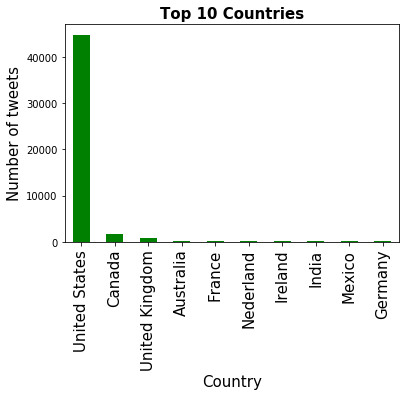

In [62]:
#Tweets location

tweets_by_lang = tweets_df['place.country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 Countries', fontsize=15, fontweight='bold')
tweets_by_lang[:10].plot(ax=ax, kind='bar', color='green')

In [8]:
#Downloaded final voting data on csv and filtering on year 2016
voting_data = pd.read_csv('1976-2016-president.csv')
voting_2016=voting_data.loc[voting_data['year'] == 2016]
voting_2016

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
3395,2016,Alabama,AL,1,63,41,US President,"Trump, Donald J.",republican,False,1318255,2123372,20171015,NaN
3396,2016,Alabama,AL,1,63,41,US President,"Clinton, Hillary",democrat,False,729547,2123372,20171015,NaN
3397,2016,Alabama,AL,1,63,41,US President,"Johnson, Gary",libertarian,False,44467,2123372,20171015,NaN
3398,2016,Alabama,AL,1,63,41,US President,NaN,NaN,True,21712,2123372,20171015,NaN
3399,2016,Alabama,AL,1,63,41,US President,"Stein, Jill",green,False,9391,2123372,20171015,NaN
3400,2016,Alaska,AK,2,94,81,US President,"Trump, Donald J.",republican,False,163387,318608,20171015,NaN
3401,2016,Alaska,AK,2,94,81,US President,"Clinton, Hillary",democrat,False,116454,318608,20171015,NaN
3402,2016,Alaska,AK,2,94,81,US President,"Johnson, Gary",libertarian,False,18725,318608,20171015,NaN
3403,2016,Alaska,AK,2,94,81,US President,NaN,NaN,True,9201,318608,20171015,NaN
3404,2016,Alaska,AK,2,94,81,US President,"Stein, Jill",green,False,5735,318608,20171015,NaN


In [46]:
# By keeping on the first row per state, we get the figures for the winner on each state
winner = voting_2016.drop_duplicates(subset=['state'])
winner=winner.assign(votespercentage=winner.candidatevotes/winner.totalvotes)
winner


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes,votespercentage
3395,2016,Alabama,AL,1,63,41,US President,"Trump, Donald J.",republican,False,1318255,2123372,20171015,NaN,0.620831
3400,2016,Alaska,AK,2,94,81,US President,"Trump, Donald J.",republican,False,163387,318608,20171015,NaN,0.512815
3407,2016,Arizona,AZ,4,86,61,US President,"Trump, Donald J.",republican,False,1252401,2573165,20171015,NaN,0.486716
3417,2016,Arkansas,AR,5,71,42,US President,"Trump, Donald J.",republican,False,684872,1130635,20171015,NaN,0.605741
3425,2016,California,CA,6,93,71,US President,"Clinton, Hillary",democrat,False,8753788,14181595,20171015,NaN,0.617264
3431,2016,Colorado,CO,8,84,62,US President,"Clinton, Hillary",democrat,False,1338870,2780220,20171015,NaN,0.481570
3451,2016,Connecticut,CT,9,16,1,US President,"Clinton, Hillary",democrat,False,897572,1644920,20171015,NaN,0.545663
3456,2016,Delaware,DE,10,51,11,US President,"Clinton, Hillary",democrat,False,235603,441590,20171015,NaN,0.533533
3460,2016,District of Columbia,DC,11,53,55,US President,"Clinton, Hillary",democrat,False,282830,312575,20171015,NaN,0.904839
3467,2016,Florida,FL,12,59,43,US President,"Trump, Donald J.",republican,False,4617886,9420039,20171015,NaN,0.490219


In [50]:
#Subset of States where Trump eventually won
import folium
winner
only_Trump=winner[winner['candidate'].str.contains("Trump")]
only_Trump
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
Trump = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=only_Trump,
    columns=['state_po', 'votespercentage'],
    key_on='feature.id',
    fill_color='OrRd',
    fill_opacity=0.9,
    line_opacity=0.2,
    nan_fill_color='blue', #For the states where no data is available, the fill color will be blue (democrat)
    nan_fill_opacity=0.8,
    legend_name='Total Votes (%)'
).add_to(Trump)

folium.LayerControl().add_to(Trump)

Trump

In [58]:
#Subset of States where Clinton eventually won
only_Clinton=winner[winner['candidate'].str.contains("Clinton")]
only_Clinton=only_Clinton[~only_Clinton.state_po.str.contains('DC')] #I am dropping the district of Columbia since the 
# votes percentage is way higher than the rest 90% and it affects the scale
only_Clinton
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

Clinton = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=only_Clinton,
    columns=['state_po', 'votespercentage'],
    key_on='feature.id',
    fill_color='PuBu',
    fill_opacity=0.95,
    line_opacity=0.2,
    nan_fill_color='red', #For the states where no data is available, the fill color will be red (republican)
    nan_fill_opacity=0.8,
    legend_name='Total Votes (%)'
).add_to(Clinton)

folium.LayerControl().add_to(Clinton)

Clinton